In [7]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

In [9]:
#Uploading the dataset

bike = pd.read_csv("/content/drive/MyDrive/day.csv")

In [10]:
bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**1. Data Cleaning**

In [13]:
# Understanding numeric datatypes
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [15]:
#checking for null values in dataset

print(bike.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [16]:
#checking datatypes of columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [17]:
#Checking the shape

bike.shape

(730, 16)

-- We can infer that there are no missing values in the data.

In [ ]:
# Describe the data

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# Because cnt is our dependent variable, 'casual' and 'registered' are redundant columns. We need to drop the same.
bike.drop(['casual', 'registered','instant','dteday'], inplace=True, axis = 1)
bike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


**EDA**

Performing EDA:

Pairplots to understand numericial variables and any multi-colinearity

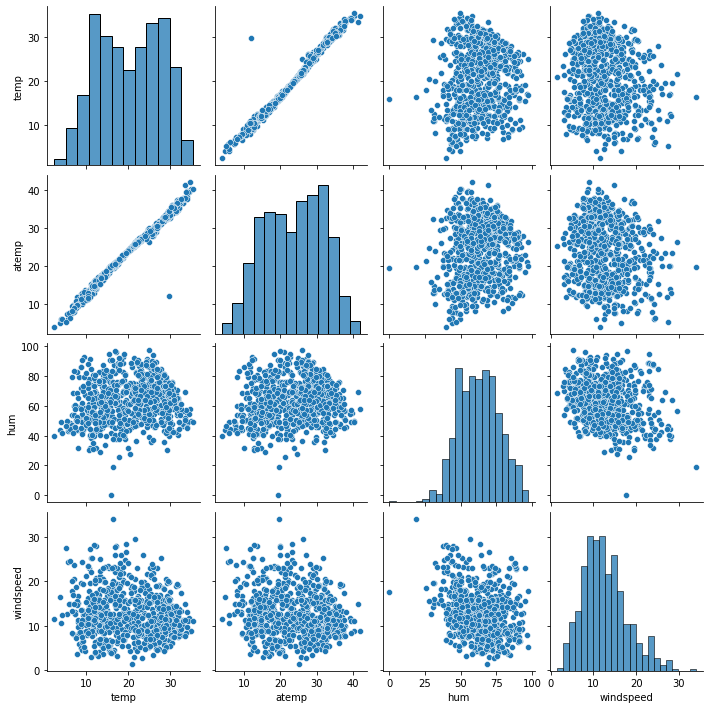

In [ ]:
#Visualize the data to check multicollinearity
sns.pairplot(data=bike, vars=['temp', 'atemp', 'hum','windspeed'])
plt.show()

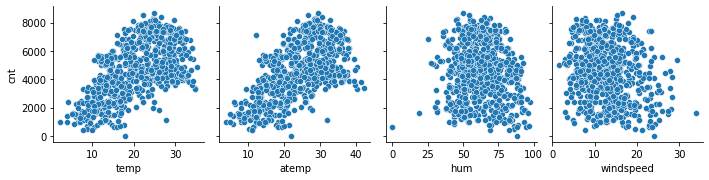

In [ ]:
#Visualizing the data using pairplot for numeric variables
sns.pairplot(data=bike,x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt')
plt.show()

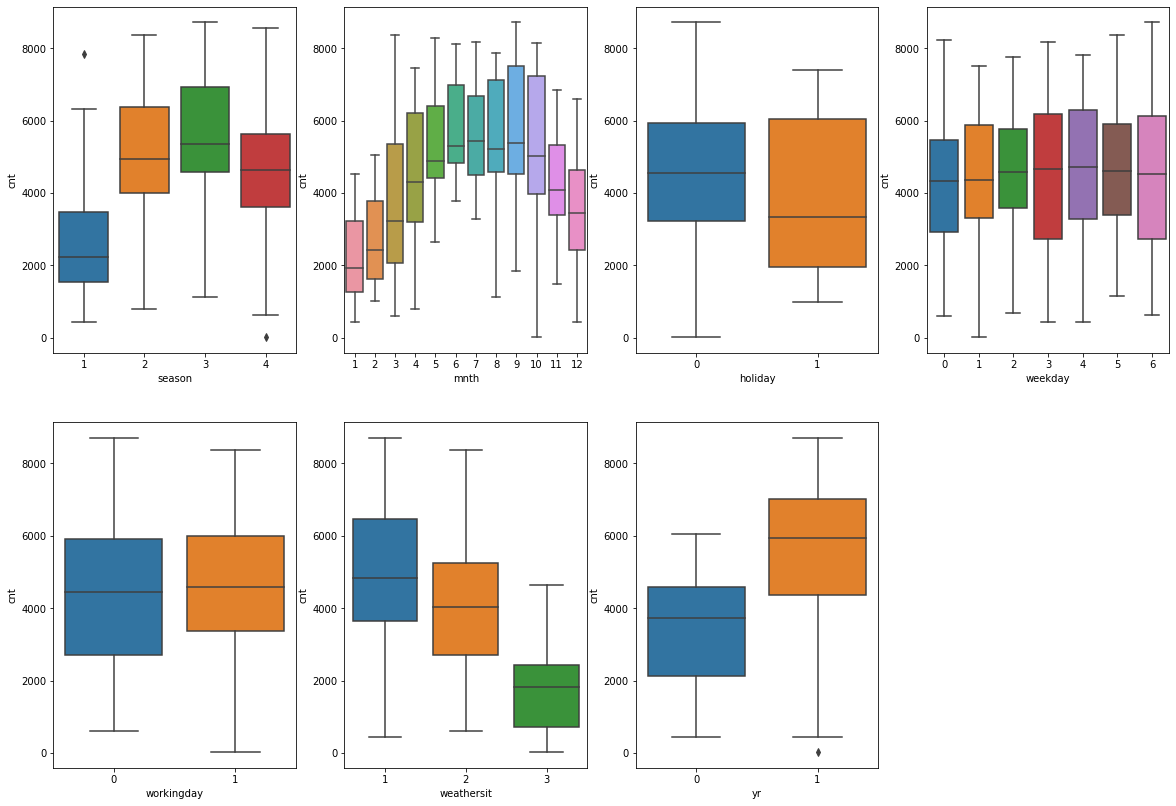

In [ ]:
#Visualizing the data using boxplots for categorical variables

plt.figure(figsize=(20, 14))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)

plt.show()

Inferences:

The bike demand is significantly high on Summer and Fall, and when there are no holidays.
The bike demand on total was more in 2019 compared to 2018, implying an increase in customer base.
Clear, Few clouds, Partly cloudy, Partly cloudy weather has the maximum count followed by Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist weather. Also, during Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, no one supposedly use the bikes.

In [ ]:

# Converting some numerical variables into categorical to gain better insights and meaning from the data

#Season

bike['season'] = bike['season'].map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

#Weekday

bike['weekday'] = bike['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})


#Weathersit

bike['weathersit'] = bike['weathersit'].map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

#mnth
bike['mnth'] = bike['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [ ]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
#Creating dummy variables for season, mnth, weekday, weathersit

d = bike[['season','mnth','weekday','weathersit']]
d = pd.get_dummies(d,drop_first=True )

In [ ]:
#Concatenating dummy variables to the actual dataset and displaying the same & dropping the columns out of which dummy variables were created.

bike = pd.concat([d,bike],axis = 1)
bike.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


**2. Creating a model & training it**

In [ ]:
#Split the data into training and testing set (7:3).

bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
#Rescaling the training dataset to build a model. Since dummy variables are already between 0 & 1, scaling would be done to the variables except the dummy ones.

scaling = MinMaxScaler()

num_vars = ['cnt','temp','atemp','hum','windspeed']
bike_train[num_vars] = scaling.fit_transform(bike_train[num_vars])
bike_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


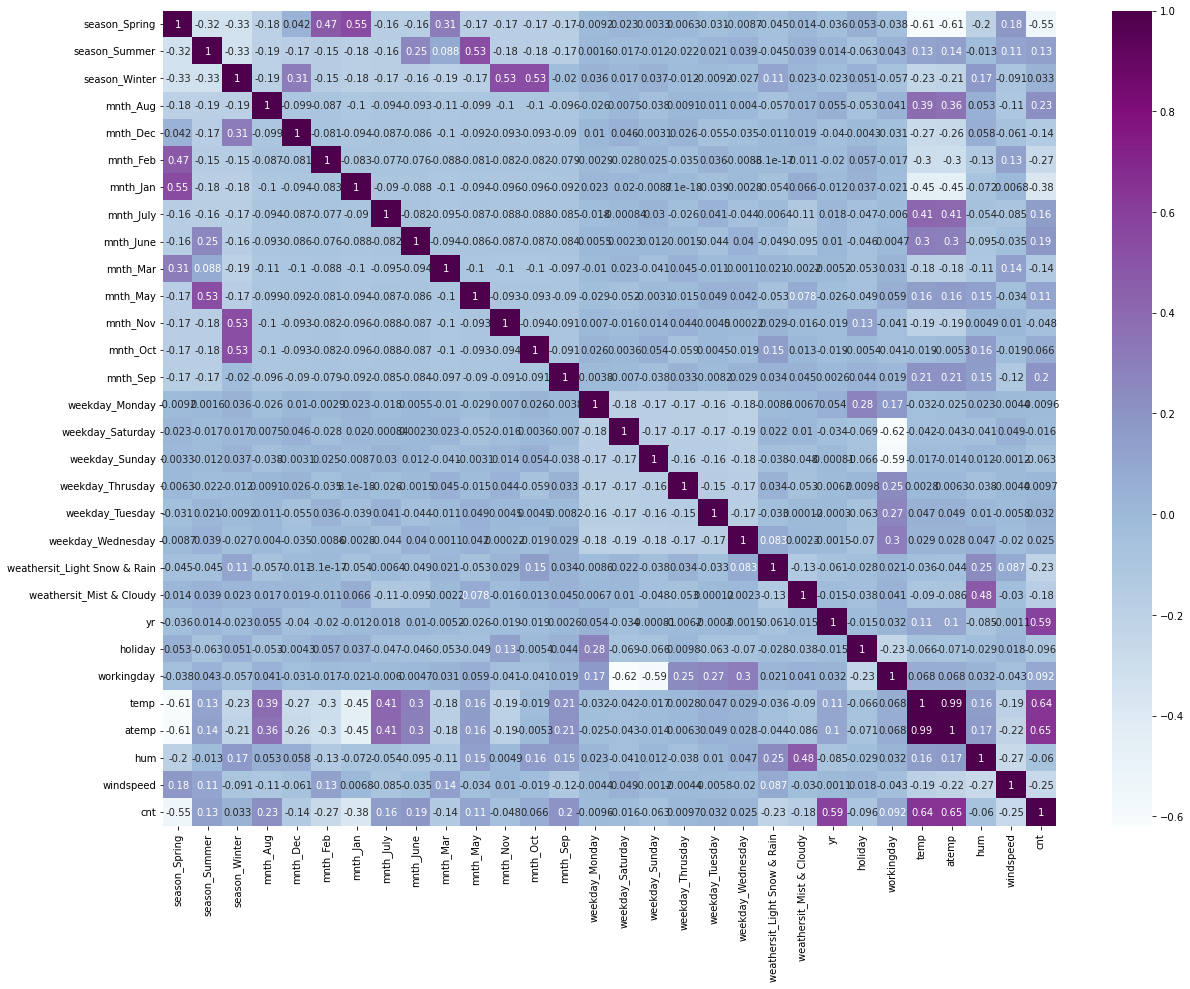

In [ ]:
#Building the correlation matrix to check the variables highly correlated to 'cnt'.

plt.figure(figsize = (20, 15))
sns.heatmap(bike_train.corr(), annot = True, cmap="BuPu")
plt.show()

In [ ]:
#Dividing the training data into x and Y to build the model
y_train = bike_train.pop('cnt')
X_train = bike_train

In [ ]:
#We are going to use statsmodel to build the model but if we don't add a constant, statsmodel would build a line passing through origin which is not wanted.
lm = LinearRegression()
lm.fit(X_train, y_train)

#RFE for 15 variables
rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)

#Print columns produced by RFE that can be used for elimination in the future.
col = X_train.columns[rfe.support_]
col

Index(['season_Winter', 'mnth_Jan', 'mnth_Sep', 'weekday_Saturday',
       'weekday_Sunday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['season_Spring', 'season_Summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'weekday_Monday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
#Build a model with all variables
X_train_rfe = sm.add_constant(X_train_rfe)

#Create the model
lr = sm.OLS(y_train,X_train_rfe)

#Fit the model
lr_model = lr.fit()

#Parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          2.39e-178
Time:                        14:39:46   Log-Likelihood:                 483.39
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     496   BIC:                            -879.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1811      0.024      7.467      0.000       0.133       0.229
season_Winter                    0.0966      0.011      8.691      0.000       0.075       0.118
mnth_Jan                        -0.0761      0.018     -4.270      0.000      -0.111      -0.041
mnth_Sep                         0.0771      0.016      4.808      0.000       0.046       0.109
weekday_Saturday                 0.0903      0.012      7.662      0.000       0.067       0.113
weekday_Sunday                   0.0353      0.012      2.850      0.005       0.011       0.060
weathersit_Light Snow & Rain    -0.2540      0.028     -9.113      0.000      -0.309      -0.199
weathersit_Mist & Cloudy        -0.0537      0.011     -4.848      0.000      -0.076      -0.032
yr                               0.2313      0.009     27.039      0.000       0.214       0.248
holiday                         -0.0264      0.022     -1.187      0.236      -0.070       0.017
workingday                       0.0818      0.009      8.618      0.000       0.063       0.100
temp                             0.4344      0.134      3.246      0.001       0.171       0.697
atemp                            0.1058      0.143      0.742      0.459      -0.174       0.386
hum                             -0.1360      0.040     -3.432      0.001      -0.214      -0.058
windspeed                       -0.1730      0.027     -6.307      0.000      -0.227      -0.119
==============================================================================
Omnibus:                       50.667   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.737
Skew:                          -0.586   Prob(JB):                     1.33e-22
Kurtosis:                       4.835   Cond. No.                     7.27e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.01e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We see that we are able to explain almost 85% of the data using this model which is pretty good. Now we need to check the VIF values of the independent variables.

In [ ]:
#VIFs for the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Variables,VIF
4,weekday_Saturday,inf
5,weekday_Sunday,inf
9,holiday,inf
10,workingday,inf
12,atemp,51.66
11,temp,51.39
13,hum,1.88
7,weathersit_Mist & Cloudy,1.56
2,mnth_Jan,1.44
1,season_Winter,1.30


In [ ]:

#We see that the VIF values of the constant is too high implying it must be removed from the model. [A VIF <=5 is ideally accepted.]
X_train_1 = X_train_rfe.drop(['const'], axis=1)

In [ ]:
#Check the VIF of the model hence formed
vif = pd.DataFrame()
X = X_train_1
vif['Variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Variables,VIF
11,atemp,51.66
10,temp,51.39
9,workingday,33.86
3,weekday_Saturday,8.36
4,weekday_Sunday,8.16
8,holiday,2.23
12,hum,1.88
6,weathersit_Mist & Cloudy,1.56
1,mnth_Jan,1.44
0,season_Winter,1.30


In [ ]:
#We see in the new model, humidity and temp has a high VIF value. However, we shall only drop the hum first to see the impact on the model.
X_train_1 = X_train_1.drop(['hum'], axis=1)

In [ ]:
## NEXT MODEL (FINAL)

# Adding a constant variable 
X_train_2 = sm.add_constant(X_train_1)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_2).fit()   

# Check the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     190.1
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          5.57e-177
Time:                        14:42:04   Log-Likelihood:                 477.41
No. Observations:                 510   AIC:                            -928.8
Df Residuals:                     497   BIC:                            -873.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1209      0.017      7.142      0.000       0.088       0.154
season_Winter                    0.0893      0.011      8.098      0.000       0.068       0.111
mnth_Jan                        -0.0799      0.018     -4.440      0.000      -0.115      -0.045
mnth_Sep                         0.0731      0.016      4.525      0.000       0.041       0.105
weekday_Saturday                 0.0774      0.011      6.855      0.000       0.055       0.100
weekday_Sunday                   0.0183      0.011      1.590      0.112      -0.004       0.041
weathersit_Light Snow & Rain    -0.2917      0.026    -11.264      0.000      -0.343      -0.241
weathersit_Mist & Cloudy        -0.0758      0.009     -8.289      0.000      -0.094      -0.058
yr                               0.2344      0.009     27.265      0.000       0.217       0.251
holiday                         -0.0420      0.022     -1.910      0.057      -0.085       0.001
workingday                       0.0673      0.009      7.834      0.000       0.050       0.084
temp                             0.4457      0.135      3.297      0.001       0.180       0.711
atemp                            0.0714      0.144      0.496      0.620      -0.211       0.354
windspeed                       -0.1494      0.027     -5.567      0.000      -0.202      -0.097
==============================================================================
Omnibus:                       48.682   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.794
Skew:                          -0.583   Prob(JB):                     1.17e-20
Kurtosis:                       4.721   Cond. No.                     6.74e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.03e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

R-squared value being very high implies the final model can describe 97% of the data!

In [ ]:
# Calculate the VIF for the new model again

vif = pd.DataFrame()
X = X_train_1
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,variables,VIF
11,atemp,51.40
10,temp,51.36
9,workingday,15.74
3,weekday_Saturday,4.39
4,weekday_Sunday,4.07
8,holiday,1.53
1,mnth_Jan,1.44
0,season_Winter,1.26
12,windspeed,1.14
2,mnth_Sep,1.07


**3. Residual analysis**

We shall now plot the histogram of error terms in order to check whether it is normally distributed, which is one of the important assumptions of linear regression.



In [ ]:
y_train_2 = lm.predict(X_train_2)

Text(0.5, 0, 'Error')

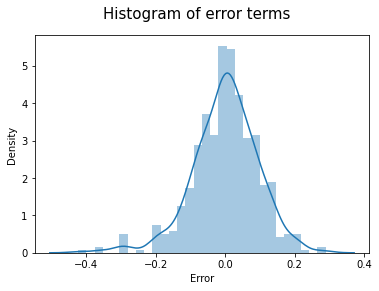

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_2), bins = 30)
# Plot heading 
fig.suptitle('Histogram of error terms', fontsize = 15)  
# X-label
plt.xlabel('Error', fontsize = 10)       

Inference: The error terms are in a good histogram shape in normal distribution.

**4. Predicting using the final model and the test set**


In [ ]:
#Scaling the terms on test set

var = ['cnt','hum','windspeed','temp','atemp']
bike_test[var] = scaling.transform(bike_test[var])
bike_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.214503,0.687342,1.809432,0.226998,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.079240,0.266307,0.439359,0.130866,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.040780,0.067625,0.698771,-0.064404,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.145234,0.457270,1.481350,0.133043,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.214418,0.707150,1.777667,0.215632,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.282370,0.908736,2.120341,0.300387,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.358772,1.234827,2.881888,0.631282,0.963300


In [ ]:
# Splitting the test set
y_test = bike_test.pop('cnt')
X_test = bike_test

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [ ]:
# Setting the test set for prediction

test_col = X_train_2.columns
X_test=X_test[test_col[1:]]

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Winter                 219 non-null    uint8  
 2   mnth_Jan                      219 non-null    uint8  
 3   mnth_Sep                      219 non-null    uint8  
 4   weekday_Saturday              219 non-null    uint8  
 5   weekday_Sunday                219 non-null    uint8  
 6   weathersit_Light Snow & Rain  219 non-null    uint8  
 7   weathersit_Mist & Cloudy      219 non-null    uint8  
 8   yr                            219 non-null    int64  
 9   holiday                       219 non-null    int64  
 10  workingday                    219 non-null    int64  
 11  temp                          219 non-null    float64
 12  atemp                         219 non-null    float64
 13  wind

In [ ]:
# Making predictions using the final model

y_pred = lm.predict(X_test)

Text(0, 0.5, 'y_pred')

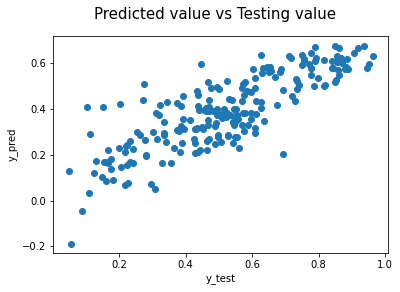

In [ ]:
#Plotting the graph for actual vs predicted values

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('Predicted value vs Testing value', fontsize = 15)
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_pred', fontsize = 10)      


**There is good amount of overlap between predicted and test data. The model is good enough to make predictions for demand for our Bike Problem**

In [ ]:
#Check for the coefficients of the independent variables for the model.

param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient'},inplace = True)
param['index'] = list(range(0,14))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient',ascending = False,inplace = True)
param

,Variables,Coefficient
index,,
11,temp,0.445696
8,yr,0.234389
0,const,0.120899
1,season_Winter,0.089330
4,weekday_Saturday,0.077392
3,mnth_Sep,0.073138
12,atemp,0.071387
10,workingday,0.067258
5,weekday_Sunday,0.018250


**5.R-squared score**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.18028020203927891

In [ ]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.31570905911347624

In [ ]:
#R square of our model is 0.31570905911347624

# **6. Conclusion:**

The equation of our best fitted line is with an R-squared value of 31%:


**cnt= 0.246 X yr - 0.083 X holiday - 0.198 X Spring - 0.321 X Light rain_Light snow_Thunderstorm - 0.090 X Mist_Cloudy +0.063 X 3 + 0.123 X 5 +0.148 X 6 +0.153 X 8 + 0.193 X 9 -0.049 X Sunday + 0.126 X 7 + 0.116 X 10**



The positive coefficients imply the factors which, on increasing, would lead to the increase in count and the negative coefficients imply that the factors with negative coeff. on increase, would lead to the decrease in total count.

By looking at the equation, we can imply that temperature is a major deciding factor of the count followed by the year and season (Winter and summer), where the curve is with positive coefficient.

The rental count drops during holidays and fall season